In [3]:
# THis is just for visualization

import os 
import librosa
import math
import json
import librosa.display
import numpy as np

path = "./breath/pos_new/0pos-0426-126-breathe-m-46.wav"
sr = 22050


# Zero crossing rate
y, sr = librosa.load(path, sr = sr)
zc = librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=12, n_fft=4096)

# mfcc = librosa.feature.mfcc(y,
#                             sr =sr,
#                             n_fft = 2048,
#                             n_mfcc = 13,
#                             hop_length = 512
#                             )
                    
features = librosa.feature.chroma_cqt(y=y, sr=sr)

# pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
# rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.1)

# features = np.concatenate((mfcc, chroma_cq, pitches, rolloff), axis = 0)

# features = features.T
# zc = librosa.feature.zero_crossing_rate(y)

# print(spectral_entropy(zc, 100, method='welch', normalize=True))

# librosa.display.waveplot(zc[0], sr)

# print(mfcc.shape)
# print(chroma_cq.shape)
# print(pitches.shape)
# print(rolloff.shape)
print(features.shape)

(12, 156)


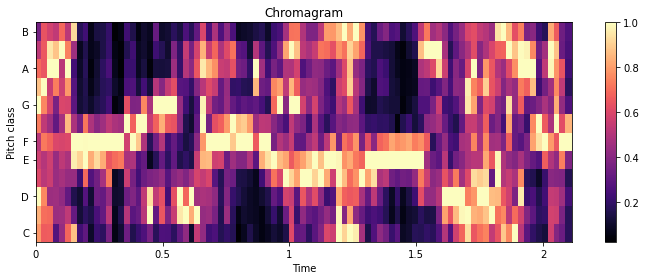

In [8]:
# for plotting features

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(features, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

In [4]:
# Extracting mel features

import os 
import librosa
import math
import json
import librosa.display
import numpy as np
from mel_features import log_mel_spectrogram as lms

path = "./breath/pos_new/0pos-0426-126-breathe-m-46.wav"
sr = 22050


# Zero crossing rate
y, sr = librosa.load(path, sr = sr)
# zc = librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=12, n_fft=4096)

features = lms(y,
            audio_sample_rate=16000,
            log_offset=0.01,
            window_length_secs=0.025,
            hop_length_secs=0.010,
            num_mel_bins = 64,
            lower_edge_hertz = 125,
            upper_edge_hertz = 7500
            )
       
# print(features.shape)

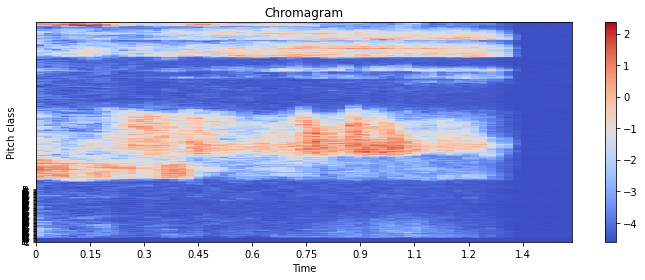

In [5]:
# for plotting features

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(features, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

# Extracting only Log mel Spectrogram

In [6]:
import os 
import librosa
import math
import json


DATASET_PATH = "breath2"
JSON_PATH = "FYP_test1.json"
SAMPLE_RATE = 22050
DURATION = 4  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION0pos-0426-126-breathe-m-46

def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment 
                    
                    
                    features = lms(signal[start_sample: finish_sample],
                            audio_sample_rate=16000,
                            log_offset=0.01,
                            window_length_secs=0.025,
                            hop_length_secs=0.010,
                            num_mel_bins = 64,
                            lower_edge_hertz = 125,
                            upper_edge_hertz = 7500
                        )
                    data["mfcc"].append(features.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 1)
                


 Processing breath2/neg
breath2/neg/1neg-0421-078-breathe-f-29.wav, segment : 0
breath2/neg/1neg-0421-091-breathe-m-47.wav, segment : 0
breath2/neg/1neg-0421-089-breathe-f-20.wav, segment : 0
breath2/neg/0neg-0423-142-breathe-m-24.wav, segment : 0
breath2/neg/1neg-0420-058-breathe-m-23.wav, segment : 0
breath2/neg/0neg-0423-146-breathe-m-35.wav, segment : 0
breath2/neg/0neg-0422-114-breathe-m-26.wav, segment : 0
breath2/neg/0neg-0423-140-breathe-m-19.wav, segment : 0
breath2/neg/0neg-0422-106-breathe-m-19.wav, segment : 0
breath2/neg/0neg-0420-064-breathe-m-22.wav, segment : 0
breath2/neg/0neg-0421-082-breathe-m-28.wav, segment : 0
breath2/neg/1neg-0422-099-breathe-m-50.wav, segment : 0
breath2/neg/0neg-0420-068-breathe-m-32.wav, segment : 0
breath2/neg/1neg-0420-045-breathe-f-29.wav, segment : 0
breath2/neg/0neg-0423-147-breathe-m-34.wav, segment : 0
breath2/neg/1neg-0423-122-breathe-m-36.wav, segment : 0
breath2/neg/0neg-0420-075-breathe-f-17.wav, segment : 0
breath2/neg/0neg-0423-1

breath2/pos/2pos-0426-125-breathe-m-30.wav, segment : 0
breath2/pos/2pos-0426-124-breathe-m-38.wav, segment : 0


# Combining 4 features

In [7]:
import os 
import librosa
import math
import json


DATASET_PATH = "breath2"
JSON_PATH = "FYP_test1.json"
SAMPLE_RATE = 22050
DURATION = 4  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment 
                    
                    
                    zc = librosa.feature.chroma_stft(y=signal[start_sample: finish_sample],
                                                     sr=sr,n_chroma=12, n_fft=4096)

                    mfcc = librosa.feature.mfcc(signal[start_sample: finish_sample],
                                                sr =sr,
                                                n_fft = 2048,
                                                n_mfcc = 13,
                                                hop_length = 512
                                                )

                    chroma_cq = librosa.feature.chroma_cqt(y=signal[start_sample: finish_sample], sr=sr)

                    pitches, magnitudes = librosa.piptrack(y=signal[start_sample: finish_sample], sr=sr)
                    rolloff = librosa.feature.spectral_rolloff(y=signal[start_sample: finish_sample], sr=sr, roll_percent=0.1)

                    features = np.concatenate((zc, mfcc, chroma_cq, pitches, rolloff), axis = 0)
                    
                    data["mfcc"].append(features.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 1)
                


 Processing breath2/neg
breath2/neg/1neg-0421-078-breathe-f-29.wav, segment : 0
breath2/neg/1neg-0421-091-breathe-m-47.wav, segment : 0
breath2/neg/1neg-0421-089-breathe-f-20.wav, segment : 0
breath2/neg/0neg-0423-142-breathe-m-24.wav, segment : 0
breath2/neg/1neg-0420-058-breathe-m-23.wav, segment : 0
breath2/neg/0neg-0423-146-breathe-m-35.wav, segment : 0
breath2/neg/0neg-0422-114-breathe-m-26.wav, segment : 0
breath2/neg/0neg-0423-140-breathe-m-19.wav, segment : 0
breath2/neg/0neg-0422-106-breathe-m-19.wav, segment : 0
breath2/neg/0neg-0420-064-breathe-m-22.wav, segment : 0
breath2/neg/0neg-0421-082-breathe-m-28.wav, segment : 0
breath2/neg/1neg-0422-099-breathe-m-50.wav, segment : 0
breath2/neg/0neg-0420-068-breathe-m-32.wav, segment : 0
breath2/neg/1neg-0420-045-breathe-f-29.wav, segment : 0
breath2/neg/0neg-0423-147-breathe-m-34.wav, segment : 0
breath2/neg/1neg-0423-122-breathe-m-36.wav, segment : 0
breath2/neg/0neg-0420-075-breathe-f-17.wav, segment : 0
breath2/neg/0neg-0423-1

breath2/pos/2pos-0426-125-breathe-m-30.wav, segment : 0
breath2/pos/2pos-0426-124-breathe-m-38.wav, segment : 0


(128, 183899)
Model is running .....
Testing Accuracy: 0.7

Printing Classification report               precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.50      0.67      0.57         6

    accuracy                           0.70        20
   macro avg       0.67      0.69      0.67        20
weighted avg       0.73      0.70      0.71        20


ROC curve value is:  0.8095238095238096

Confusion matrix, without normalization
[[10  4]
 [ 2  4]]


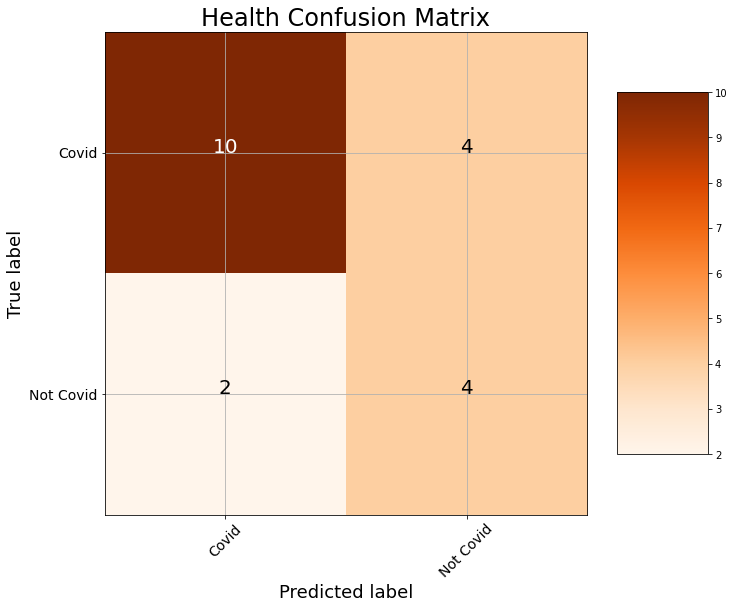

<Figure size 432x288 with 0 Axes>

In [170]:
# training the cough model

import breath_model as cm


# Calling random forest class here:
DATASET_PATH = "mel_spec.json"
save_model_in = "FYP_test1.pkl"
test_size = 20   # 20
ran_state = 10
rf_maxdepth = 15    #15
rf_ran_state = 15    # 15
rf_estimators = 90     #90
# 66

ff = cm.RF_Model(DATASET_PATH, save_model_in, test_size, ran_state, rf_maxdepth, rf_ran_state, rf_estimators)
mod = ff.train()

# Deep learning models testing
# Output: No promising results

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_93 (MaxPooling (None, 275, 32, 1)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 275, 32, 32)       832       
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 69, 8, 32)         0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 69, 8, 32)         25632     
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 18, 2, 32)         0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 18, 2, 32)         9248      
_________________________________________________________________
flatten_30 (Flatten)         (None, 1152)            

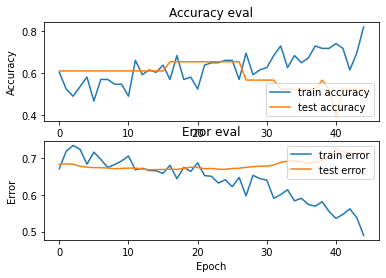

2/2 - 0s - loss: 0.8574 - accuracy: 0.4865

Test accuracy: 0.4864864945411682
Target: [0], Predicted label: [1]


In [147]:
# training the cough model

import breath_model as cm


# Calling random forest class here:
# DATASET_PATH = "mel_spec.json"
# save_model_in = "breath_model2.pkl"


import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "mel_spec.json"


def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    y = y[..., np.newaxis]
    return X, y

def plot_history(history):
    
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    # model always take input shape in the form of 3d tuple. 
    
    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.MaxPooling2D((2, 2), padding='same', input_shape=input_shape))
    model.add(keras.layers.Conv2D(32, (5, 5), padding='same',  activation='relu'))
    
    model.add(keras.layers.MaxPooling2D((4, 4), padding='same'))
    model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'))
    
    model.add(keras.layers.MaxPooling2D((4, 4), padding='same'))
    model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    
#     model.add(keras.layers.MaxPooling2D((2, 2), padding='same'))
    
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.5))

    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    
    # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))
   
    return model


def predict(model, X, y):
    
    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimizer = keras.optimizers.Adam(learning_rate=0.0002)  #0.00008
    model.compile(optimizer=optimizer,
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=45)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[0]
    y_to_predict = y_test[0]

    # predict sample
    predict(model, X_to_predict, y_to_predict)




In [5]:
X, y = load_data(DATA_PATH)
y.shape

(390, 1)

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 547, 62, 32)       320       
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 274, 31, 32)       0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 274, 31, 32)       128       
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 272, 29, 32)       9248      
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 136, 15, 32)       0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 136, 15, 32)       128       
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 135, 14, 32)     

Epoch 20/30
3/3 [==============================] - ETA: 0s - loss: 0.5160 - accuracy: 0.8068
Epoch 00020: val_loss improved from 0.76866 to 0.75809, saving model to sickweight4.h5
3/3 [==============================] - 1s 465ms/step - loss: 0.5160 - accuracy: 0.8068 - val_loss: 0.7581 - val_accuracy: 0.5217 - lr: 1.0000e-05
Epoch 21/30
3/3 [==============================] - ETA: 0s - loss: 0.4226 - accuracy: 0.8409
Epoch 00021: val_loss improved from 0.75809 to 0.75008, saving model to sickweight4.h5
3/3 [==============================] - 1s 458ms/step - loss: 0.4226 - accuracy: 0.8409 - val_loss: 0.7501 - val_accuracy: 0.5217 - lr: 1.0000e-05
Epoch 22/30
3/3 [==============================] - ETA: 0s - loss: 0.6055 - accuracy: 0.6818
Epoch 00022: val_loss improved from 0.75008 to 0.74373, saving model to sickweight4.h5
3/3 [==============================] - 1s 463ms/step - loss: 0.6055 - accuracy: 0.6818 - val_loss: 0.7437 - val_accuracy: 0.5217 - lr: 1.0000e-05
Epoch 23/30
3/3 [=====

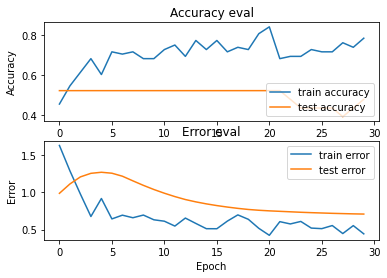

2/2 - 0s - loss: 0.7385 - accuracy: 0.4595

Test accuracy: 0.45945945382118225
Target: 0, Predicted label: [1]


In [148]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "mel_spec.json"


def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates CNN model

    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    
#     model.add(keras.layers.Dense(64, activation='relu'))
#     model.add(keras.layers.Dropout(0.5))

    # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    reduce_lr = keras.callbacks.ReduceLROnPlateau(
                    monitor='val_loss', factor=0.1, patience=6, verbose=1, mode='auto',
                    min_delta=0.0001, cooldown=0 #, min_lr=0.001
                )
    
    earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights = True, verbose=1)
    checkpoint = keras.callbacks.ModelCheckpoint(
            "sickweight4.h5", monitor='val_loss', verbose=1, save_best_only=True,
            save_weights_only=True, mode='min', save_freq='epoch' 
        )

    callbacks = [reduce_lr, earlystop, checkpoint]
    
    # compile model
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    

    model.summary()
    
    # train model
    history = model.fit(X_train, y_train,
                        validation_data=(X_validation, y_validation),
                        batch_size=32, epochs=30, callbacks = callbacks)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[2]
    y_to_predict = y_test[2]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

